In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Exercise 1:

### Code C

Le fichier **day01_exercise1.c** contient l'implémentation de ce code en C mais le contenu n'est autre que dans la cellule ci-dessous :

In [ ]:
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#define N 50000000
#define MAX_STRIDE 20

void main()
{
    
  double *data, mean, rate, msec;
    
  struct timeval tm1, tm2;
    
  data = malloc(N*MAX_STRIDE*sizeof(double));
    
  for (int i = 0; i <= N*MAX_STRIDE; i++){
    data[i] = (rand() + 1);
  }
  
  printf(" istride CPU Bandwidth \n");
  for (int istride = 1; istride <= MAX_STRIDE; istride++) {
      
    mean = 0.0;
    clock_t start_t = clock();

    for (int i = 0; i < N*istride; i += istride) {
      mean = mean + data[i];
    }
    mean = mean / N;
    clock_t end_t = clock();

    msec = ((double)(end_t - start_t) / CLOCKS_PER_SEC)*1000.0;
    rate = sizeof(double)*N*(1000.0/msec) / (1024*1024);
      
    printf(" %d, %f, %f \n",istride , msec, rate);
  }
}

### Commandes à exécuter sur lignes de commandes

In [ ]:
gcc -O0 day01.c
./a.out

gcc -O2 day02.c
./a.out

En exécutant ce code avec les commandes ci-dessus, on obtient ces résultats :

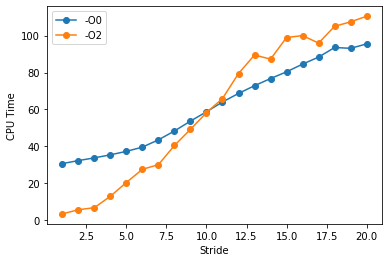

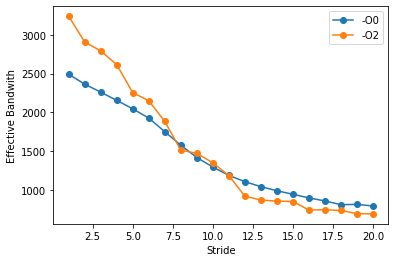

In [2]:
time_O0 = [30.624, 32.261, 33.739, 35.386, 37.268, 39.559, 43.510, 48.300, 53.667, 58.732, 64.014, 
           68.668, 72.863, 76.725, 80.387, 84.559, 88.358, 93.574, 93.115, 95.513]
bandwith_O0 = [2491.312216, 2364.897099, 2261.298358, 2156.048870, 2047.170369, 1928.611575, 1753.480701, 1579.584789, 1421.617480, 1299.018343, 
               1191.832182, 1111.055300, 1047.087621, 994.381822, 949.083127, 902.256949, 863.463923, 815.332735, 819.351826, 798.780745]

time_O2 = [3.357, 5.625, 6.733, 12.918, 20.383, 27.545, 30.048, 40.446, 49.170, 58.249, 65.918, 79.446, 89.494, 87.259,
          98.979, 100.015, 95.950, 105.074, 107.475, 110.508]

bandwith_O2 = [3236.909008, 2906.436012, 2791.582339, 2614.597166, 2255.215646, 2152.156426, 1884.731851, 1516.013165, 1475.704938, 1353.494862, 
               1189.184612, 924.629940, 874.837470, 861.025559, 856.184300, 746.300003, 750.111399, 740.797281, 700.223544, 696.731844 ]

strides = range(1, 21)

plt.plot(strides, time_O0, '-o', label="-O0")
plt.plot(strides, time_O2, '-o', label="-O2")
plt.xlabel("Stride")
plt.ylabel("CPU Time")
plt.legend()
plt.show()


plt.plot(strides, bandwith_O0, '-o', label="-O0")
plt.plot(strides, bandwith_O2, '-o', label="-O2")
plt.xlabel("Stride")
plt.ylabel("Effective Bandwith")
plt.legend()
plt.show()

# Exercise 2:

In [3]:
N = 200
MAX_STRIDE = 21

SEED = 86456
np.random.seed(SEED)

x = np.random.rand(N, N) + np.ones(N)
y = np.random.rand(N, N) +  np.ones(N)
z = np.zeros((N, N))


times = []
bandwith = []

for i_stride in [1, 2, 5, 10, 20]:
    
    start=time.time()

    r = np.zeros((i_stride, i_stride))
    u = np.zeros((i_stride, i_stride))
    v = np.zeros((i_stride, i_stride))
    
    for i in range(0, N - i_stride, i_stride):
        for j in range(0, N - i_stride, i_stride):
            for k1 in range(0, i_stride):
                for k2 in range(0, i_stride):
                    r[k1, k2] = z[i+k1, j+k2]

            for k in range(0, N - i_stride, i_stride):
                for k1 in range(0, i_stride):
                    for k2 in range(0, i_stride):
                        u[k1, k2] = x[i+k1, k+k2]
                        v[k1, k2] = y[i+k1, k+k2]

                for ii in range(0, i_stride):
                    for jj in range(0, i_stride):
                        for kk in range(0, i_stride):
                            r[ii, jj] += u[ii, kk]*v[kk, jj]

            for k1 in range(0, i_stride):
                for k2 in range(0, i_stride):
                    z[i+k1, j+k2] = r[k1, k2]
    
    end=time.time()
    
    msec = (end-start) * 1000.0; # time in milli-second;
    rate = 8 * N * (1000.0 / msec) / (1024*1024);
    
    times.append(msec)
    bandwith.append(rate)

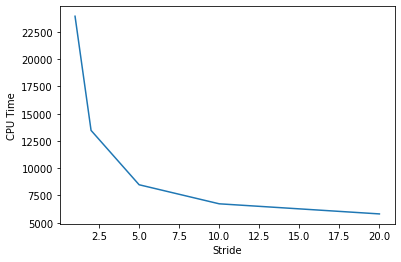

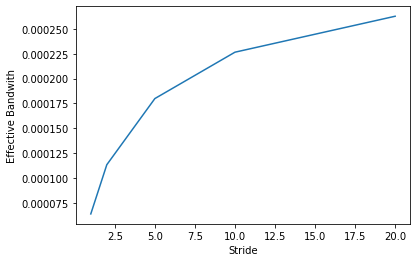

In [4]:
strides = [1, 2, 5, 10, 20]

plt.plot(strides, times)
plt.xlabel("Stride")
plt.ylabel("CPU Time")
plt.show()


plt.plot(strides, bandwith)
plt.xlabel("Stride")
plt.ylabel("Effective Bandwith")
plt.show()